In [15]:
print("""
@File         : exploring_scatter_plots.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2025-01-01 22:30:57
@Email        : cuixuanstephen@gmail.com
@Description  : Exploring scatter plots
""")


@File         : exploring_scatter_plots.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2025-01-01 22:30:57
@Email        : cuixuanstephen@gmail.com
@Description  : Exploring scatter plots



In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

plt.ion()

散点图按定义测量至少两个变量之间的关系。因此，只能使用 `pd.DataFrame` 创建散点图。`pd.Series` 根本没有足够的变量。

In [17]:
df = pd.DataFrame({
    'var_a': [1, 2, 3, 4, 5],
    'var_b': [1, 2, 4, 8, 16],
    'var_c': [500, 200, 600, 100, 400],
    'var_d': ['blue', 'orange', 'gray', 'blue', 'gray']
})

df = df.convert_dtypes(dtype_backend='numpy_nullable')
df

,var_a,var_b,var_c,var_d
0,1,1,500,blue
1,2,2,200,orange
2,3,4,600,gray
3,4,8,100,blue
4,5,16,400,gray


除了 `kind='scatter'` 之外，我们还需要明确控制在 X 轴上绘制的内容、在 Y 轴上绘制的内容、给定数据点的大小以及给定数据点应显示为何种颜色。这些分别通过 `x`、 `y`、`s` 和 `c` 参数进行控制：

<Axes: xlabel='var_a', ylabel='var_b'>

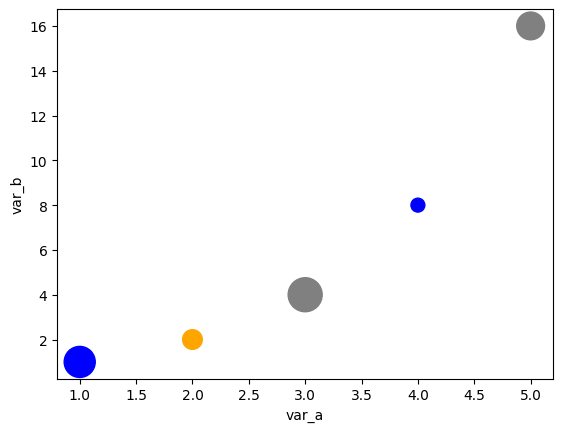

In [18]:
df.plot(kind='scatter', x='var_a', y='var_b', s='var_c', c='var_d')

In [19]:
df = pd.read_csv('../../DATA/vehicles.csv.zip',
                 dtype_backend='numpy_nullable', 
                 usecols=["city08", "highway08", "VClass", "fuelCost08", "year"])

df.head()

,city08,fuelCost08,highway08,VClass,year
0,19,2450,25,Two Seaters,1985
1,9,4700,14,Two Seaters,1985
2,23,1900,33,Subcompact Cars,1985
3,10,4700,12,Vans,1985
4,17,3400,23,Compact Cars,1993


In [20]:
car_classes = (
    "Subcompact Cars",
    "Compact Cars",
    "Midsize Cars",
    "Large Cars",
    "Two Seaters",
)

mask = (df['year'] >= 2015) & (df['VClass'].isin(car_classes))
df = df[mask]
df.head()

,city08,fuelCost08,highway08,VClass,year
27058,16,3400,23,Subcompact Cars,2015
27059,20,2250,28,Compact Cars,2015
27060,26,1700,37,Midsize Cars,2015
27061,28,1600,39,Midsize Cars,2015
27062,25,1800,35,Midsize Cars,2015


<Axes: xlabel='city08', ylabel='highway08'>

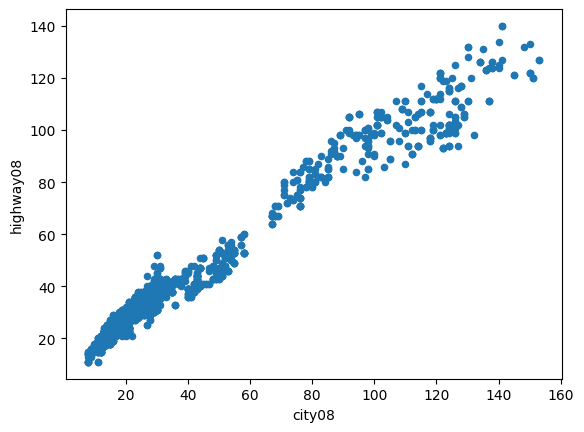

In [21]:
df.plot(kind='scatter', x='city08', y='highway08')

当然，我们仍然看到数值分布相当大；许多车辆的油耗集中在 10‑35 MPG 范围内，但有些车辆的油耗超过 100。为了进一步深入了解，我们可以为每个车辆类别分配颜色，并将其添加到可视化中。

有很多方法可以做到这一点，但通常最好的方法之一是确保您想要用于颜色的值是分类数据类型：

In [28]:
classes_ser = pd.Series(car_classes, dtype=pd.StringDtype())
cat = pd.CategoricalDtype(classes_ser)
df['VClass'] = df['VClass'].astype(cat)

<Axes: xlabel='city08', ylabel='highway08'>

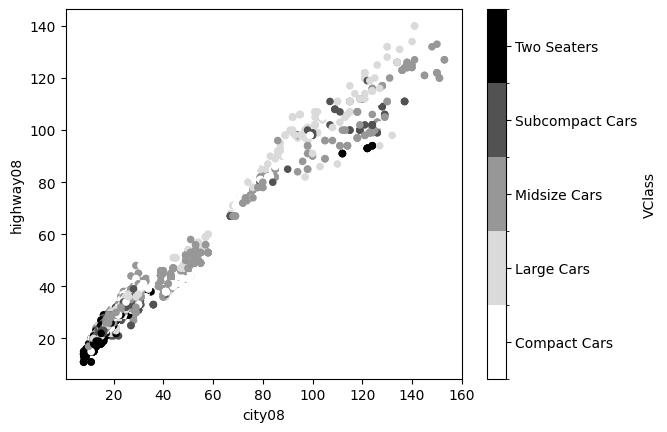

In [29]:
df.plot(kind='scatter', x='city08', y='highway08', c='VClass')

<Axes: xlabel='city08', ylabel='highway08'>

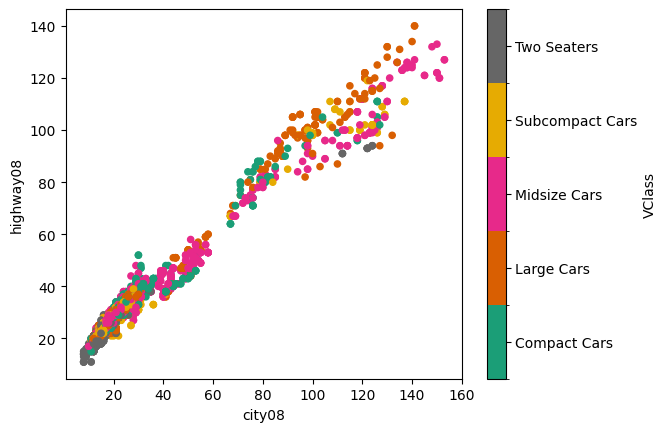

In [30]:
df.plot(kind='scatter', x='city08', y='highway08', c='VClass',
        colormap='Dark2')

<Axes: xlabel='city08', ylabel='highway08'>

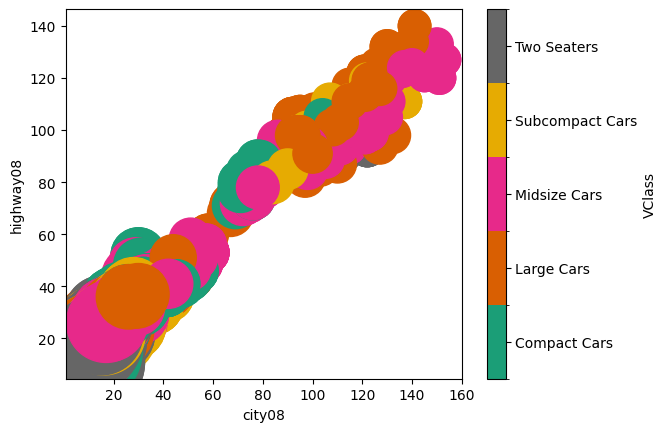

In [33]:
df.plot(kind='scatter', 
        x='city08', y='highway08', c='VClass', colormap='Dark2',
        s='fuelCost08')

<Axes: xlabel='city08', ylabel='highway08'>

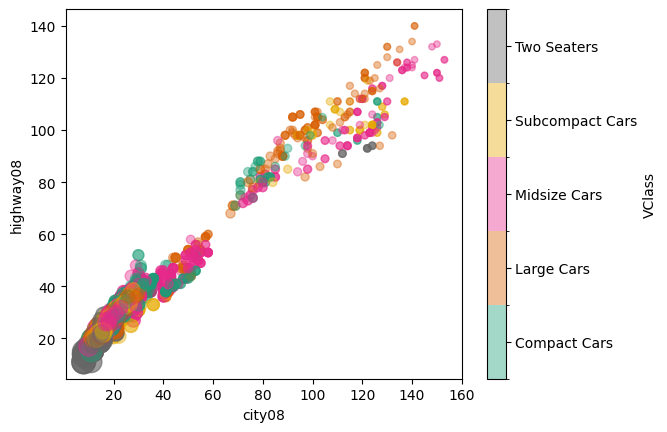

In [36]:
df.assign(
    scaled_fuel_cost=lambda x: x['fuelCost08'] / 25
).plot(kind='scatter', 
        x='city08', y='highway08', c='VClass', colormap='Dark2',
        s='scaled_fuel_cost', alpha=.4)